In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import sklearn

In [9]:
# Charger le dataset USPS
def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

In [70]:
usps_dir = '../resources/USPS/'
usps_train = usps_dir + 'USPS_train.txt'
usps_test = usps_dir + 'USPS_test.txt'
datax_train, datay_train = load_usps(usps_train)
datax_test, datay_test = load_usps(usps_test)

In [11]:
def show_usps(data):
    plt.imshow(data.reshape(16,16))
    plt.colorbar()

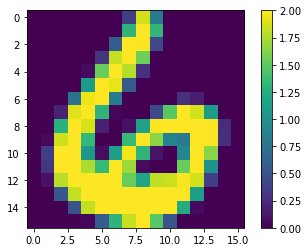

In [12]:
show_usps(datax_train[0])

In [31]:
#### Parameters for regressions
n_alphas = 200

In [45]:
# train Ridge
alphas_ridge = np.logspace(5, 1, n_alphas)
ridge_coefs = []
for a in alphas_ridge:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=True)
    ridge.fit(datax_train, datay_train)
    ridge_coefs.append(ridge.coef_)

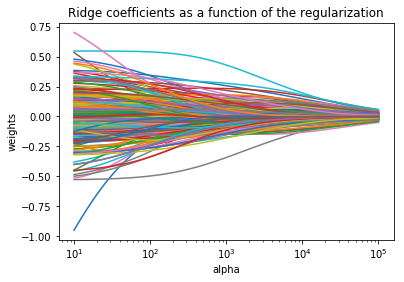

In [46]:
# #############################################################################
# Display results Ridge (weights equal to 0)

ax = plt.gca()

ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

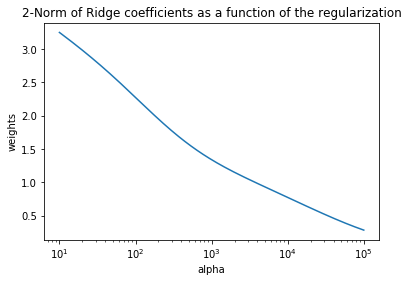

In [96]:
# #############################################################################
# Display results Ridge (norm 2 of weights)

norm_ridge_coefs = [np.linalg.norm(w) for w in ridge_coefs]

ax = plt.gca()

ax.plot(alphas_ridge, norm_ridge_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('2-Norm of Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [89]:
# Train Lasso
alphas_lasso = np.logspace(2, -2, n_alphas)
lasso_coefs = []
for a in alphas_lasso:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True)
    lasso.fit(datax_train, datay_train)
    lasso_coefs.append(lasso.coef_)


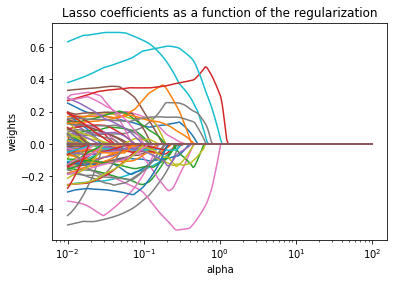

In [90]:
# #############################################################################
# Display results Lasso (weights equal to 0)

ax = plt.gca()

ax.plot(alphas_lasso, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

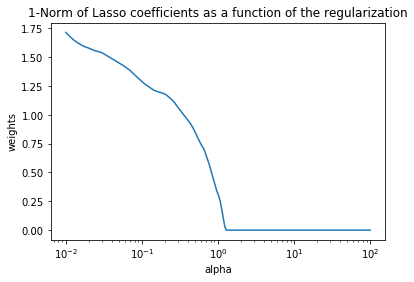

In [94]:
# #############################################################################
# Display results Lasso (norm 1 of weights)
norm_lasso_coefs = [np.linalg.norm(w) for w in lasso_coefs]

ax = plt.gca()

ax.plot(alphas_lasso, norm_lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('1-Norm of Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [58]:
alphas = np.logspace(5, -5, 1000)

In [59]:
# Train Linear regression
linear_coefs = []
linear = linear_model.LinearRegression(fit_intercept=True)
linear.fit(datax_train, datay_train)
linear_coefs.append(linear.coef_)

In [98]:
# Train Ridge with built-in CV to get the better alpha
reg_ridge = linear_model.RidgeCV(alphas = np.logspace(-3, 3, 100))
reg_ridge.fit(datax_train, datay_train)

RidgeCV(alphas=array([1.00000e-03, 1.14976e-03, ..., 8.69749e+02, 1.00000e+03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [86]:
reg_ridge.alpha_

141.74741629268047

In [97]:
# Train Lasso 
reg_lasso = linear_model.LassoCV(alphas = np.logspace(-3, 3, 100))
reg_lasso.fit(datax_train, datay_train)

LassoCV(alphas=array([1.00000e-03, 1.14976e-03, ..., 8.69749e+02, 1.00000e+03]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [ ]:
reg_lasso.alpha_

In [99]:
# Compare performance of LinearRegression, Ridge and Lasso on the test dataset
linear_pred = linear.predict(datax_test)
ridge_pred = reg_ridge.predict(datax_test)
lasso_pred = reg_lasso.predict(datax_test)

print("linear mean squared error: ", sklearn.metrics.mean_squared_error(datay_test, linear_pred))


print("ridge mean squared error: ", sklearn.metrics.mean_squared_error(datay_test, ridge_pred))

print("lasso mean squared error: ", sklearn.metrics.mean_squared_error(datay_test, lasso_pred))

linear mean squared error:  3.7549053135627135
ridge mean squared error:  3.6942365444755985
lasso mean squared error:  3.709303352040891
